In [1]:
from tensorflow.keras.datasets.mnist import load_data

# 텐서플로우 저장소에서 데이터를 다운 받습니다.
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')

In [2]:
# 학습 데이터
print(x_train.shape, y_train.shape)
print(y_train)

# 테스트 데이터
print(x_test.shape, y_test.shape)
print(y_test)

(60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]


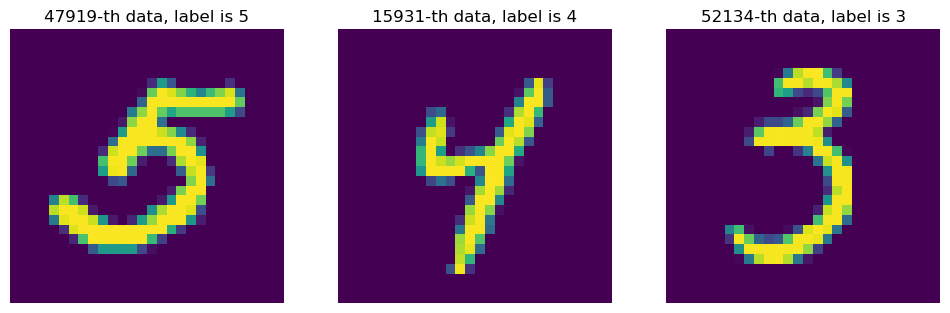

In [3]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

sample_size = 3
# 0~59999의 범위에서 무작위로 세 개의 정수를 뽑습니다.
random_idx = np.random.randint(60000, size=sample_size)

fig, axes = plt.subplots(1, 3, figsize = (12,4))

for i, idx in enumerate(random_idx):
    img = x_train[idx, :]
    label = y_train[idx]

    axes[i].imshow(img)
    axes[i].set_title('%d-th data, label is %d' % (idx, label))
    axes[i].axis('off')

In [4]:
# 검증 데이터 만들기

from sklearn.model_selection import train_test_split

# 훈련/테스트 데이터를 0.7/0.3의 비율로 분리합니다.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 777)
print(f'훈련 데이터 {x_train.shape} 레이블 {y_train.shape}')
print(f'검증 데이터 {x_val.shape} 레이블 {y_val.shape}')

훈련 데이터 (42000, 28, 28) 레이블 (42000,)
검증 데이터 (18000, 28, 28) 레이블 (18000,)


In [5]:
# 모델 입력을 위한 데이터 전처리

num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

# 모델의 입력으로 사용하기 위한 전처리 과정입니다.
x_train = (x_train.reshape((num_x_train, 28 * 28))) /255
x_val = (x_val.reshape((num_x_val, 28 * 28))) / 255
x_test = (x_test.reshape((num_x_test, 28 * 28))) / 255

print(x_train.shape)    # 모델 입력을 위해 데이터를 784차원으로 변경합니다.

(42000, 784)


In [6]:
# 모델 입력을 위한 레이블 전처리

from tensorflow.keras.utils import to_categorical

# 각 데이터의 레이블을 범주형 형태로 변경합니다.
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(y_train)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
# 모델 구성하기

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
# 입력 데이터의 형태를 꼭 명시해야 합니다.
# 784차원의 데이터를 입력으로 받고, 64개의 출력을 가지는 첫 번째 Dense층
model.add(Dense(64, activation = 'relu', input_shape = (784, )))
# 32개의 출력을 가지는 Dense층
model.add(Dense(32, activation = 'relu'))
# 10개의 출력을 가지는 신경망
model.add(Dense(10, activation = 'softmax'))

C:\Users\human\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# 소프트 맥스와 시그모이드 값의 비교

def softmax(arr):
    m = np.max(arr)
    arr = arr - m   # exp의 오버플로우 방지
    arr = np.exp(arr)
    return arr / np.sum(arr)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

case_1 = np.array([3.1, 3.0, 2.9])
case_2 = np.array([2.0, 1.0, 0.7])

np.set_printoptions(precision=3)    # numpy 소수점 제한
print(f'sigmoid {sigmoid(case_1)}, softmax {softmax(case_1)}')
print(f'sigmoid {sigmoid(case_2)}, softmax {softmax(case_2)}')

sigmoid [0.957 0.953 0.948], softmax [0.367 0.332 0.301]
sigmoid [0.881 0.731 0.668], softmax [0.61  0.224 0.166]


In [10]:
# 학습과정 설정하기

model.compile(optimizer = 'adam', # 옵티마이저 : Adam
              # 손실함수: categorical_crossentropy
              loss = 'categorical_crossentropy',
              # 모니터링 할 평가지표 : acc
              metrics = ['acc'])

In [11]:
# 모델 학습하기

history = model.fit(x_train, y_train, epochs = 30, batch_size = 128, validation_data = (x_val, y_val))

Epoch 1/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.7428 - loss: 0.8935 - val_acc: 0.9272 - val_loss: 0.2589
Epoch 2/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9324 - loss: 0.2336 - val_acc: 0.9430 - val_loss: 0.1999
Epoch 3/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9502 - loss: 0.1742 - val_acc: 0.9461 - val_loss: 0.1841
Epoch 4/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9590 - loss: 0.1457 - val_acc: 0.9570 - val_loss: 0.1500
Epoch 5/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9673 - loss: 0.1155 - val_acc: 0.9594 - val_loss: 0.1349
Epoch 6/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9714 - loss: 0.1000 - val_acc: 0.9611 - val_loss: 0.1303
Epoch 7/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9756 - loss: 0.0816 - val_acc: 0.9638 - val_loss: 0.1181
Epoch 8/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9792 - loss: 0.0684 - val_acc: 0.9641 - val_loss: 0.1194
Epoch 9/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - ac

In [12]:
# history를 통해 확인해볼 수 있는 값 출력

history.history.keys()

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

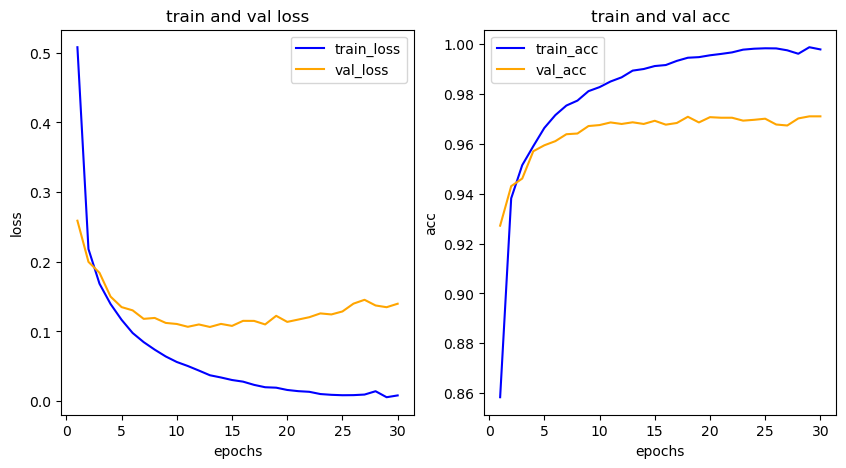

In [13]:
# 학습 결과 그려보기

import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']     # 검증 데이터가 있는 경우 val_ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [14]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - acc: 0.9681 - loss: 0.1398


[0.12745043635368347, 0.9713000059127808]

In [17]:
import numpy as np

results = model.predict(x_test)
print(result.shape)
np.set_printoptions(precision=7)    # numpy 소수점 제한
print(f'각 클래스에 속할 확률 : \n{results [0]}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step
(10000, 10)
각 클래스에 속할 확률 : 
[3.7750378e-10 1.1678709e-08 5.0144466e-10 5.1186375e-06 1.7284099e-15
 1.0059967e-10 3.0391360e-18 9.9999487e-01 3.1219447e-09 7.6980271e-09]


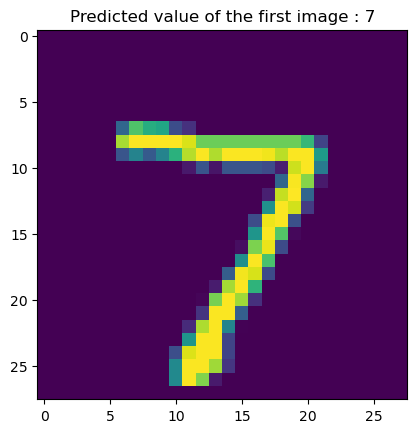

In [18]:
import matplotlib.pyplot as plt

arg_results = np.argmax(results, axis = -1)     # 가장 큰 값의 인덱스를 가져옵니다.
plt.imshow(x_test[0].reshape(28, 28))
plt.title('Predicted value of the first image : ' + str(arg_results[0]))
plt.show()

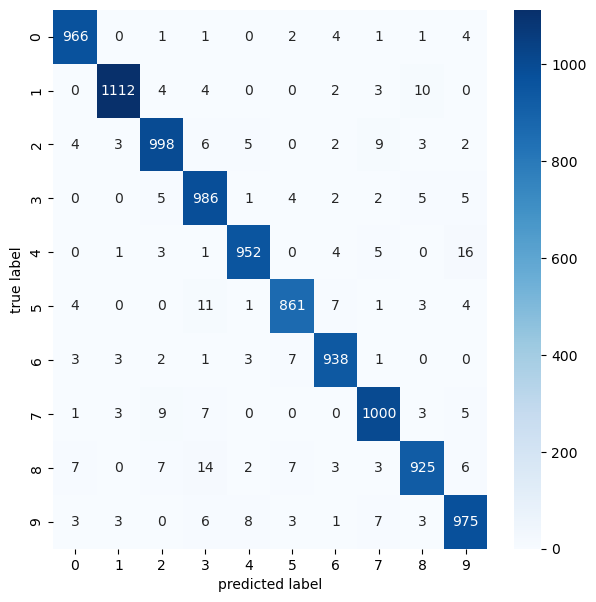

In [19]:
# 모델 평가 방법 1-혼동행렬
# sklearn.metrics 모듈은 여러 가지 평가지표에 관한 기능을 제공합니다.
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 혼동행렬을 만듭니다.
plt.figure(figsize = (7, 7))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()